In [1]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps.zip -O /workspaces/codespaces-jupyter/data/rps.zip
  
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps-test-set.zip -O /workspaces/codespaces-jupyter/data/rps-test-set.zip


--2024-06-16 06:09:56--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.155, 172.217.14.123, 142.250.68.91, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/workspaces/codespaces-jupyter/data/rps.zip’

/workspaces/codespa 100%[===================>] 191.38M  39.7MB/s    in 5.0s    

2024-06-16 06:10:01 (38.5 MB/s) - ‘/workspaces/codespaces-jupyter/data/rps.zip’ saved [200682221/200682221]

--2024-06-16 06:10:02--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.68.91, 142.250.217.155, 142.250.68.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.68.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [app

In [2]:
import os
import zipfile

local_zip = '/workspaces/codespaces-jupyter/data/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/workspaces/codespaces-jupyter/data/')
zip_ref.close()

local_zip = '/workspaces/codespaces-jupyter/data/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/workspaces/codespaces-jupyter/data/')
zip_ref.close()


In [3]:
rock_dir = os.path.join('/workspaces/codespaces-jupyter/data/rps/rock')
paper_dir = os.path.join('/workspaces/codespaces-jupyter/data/rps/paper')
scissors_dir = os.path.join('/workspaces/codespaces-jupyter/data/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock05ck01-068.png', 'rock07-k03-118.png', 'rock04-114.png', 'rock01-103.png', 'rock01-043.png', 'rock04-030.png', 'rock04-050.png', 'rock05ck01-018.png', 'rock01-041.png', 'rock04-049.png']
['paper06-044.png', 'paper05-081.png', 'paper03-089.png', 'paper02-000.png', 'paper03-008.png', 'paper07-046.png', 'paper02-054.png', 'paper06-008.png', 'paper07-000.png', 'paper05-082.png']
['testscissors03-083.png', 'testscissors03-046.png', 'testscissors01-024.png', 'scissors03-092.png', 'scissors03-112.png', 'testscissors03-014.png', 'testscissors02-026.png', 'scissors02-118.png', 'scissors01-085.png', 'testscissors02-119.png']


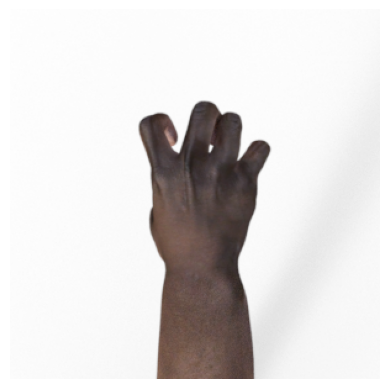

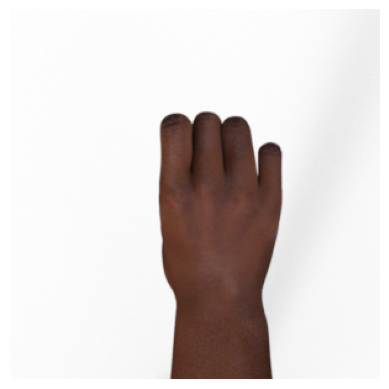

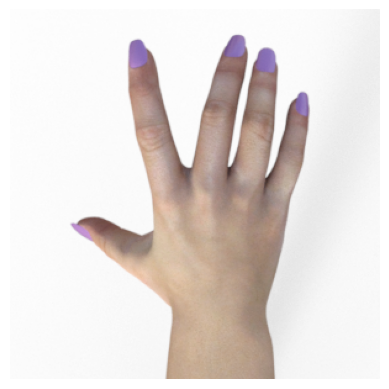

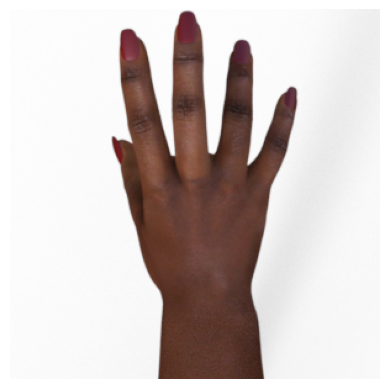

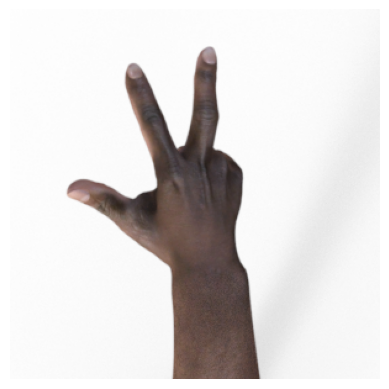

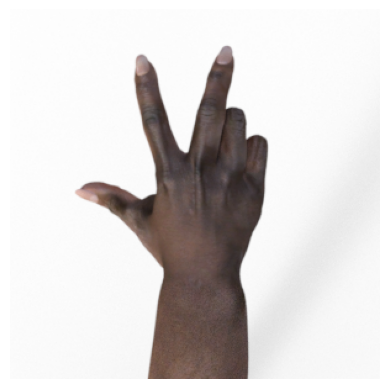

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/workspaces/codespaces-jupyter/data/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/workspaces/codespaces-jupyter/data/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


2024-06-16 06:10:08.021317: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-16 06:10:08.021353: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


2024-06-16 06:10:15.463346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-16 06:10:15.463376: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-16 06:10:15.463395: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-11eef8): /proc/driver/nvidia/version does not exist
2024-06-16 06:10:15.463783: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2024-06-16 06:10:18.303267: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.
2024-06-16 06:10:20.936060: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.


 1/20 [>.............................] - ETA: 1:31 - loss: 1.1105 - accuracy: 0.2460

2024-06-16 06:10:21.534280: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.
2024-06-16 06:10:23.872933: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.


 2/20 [==>...........................] - ETA: 52s - loss: 2.7929 - accuracy: 0.3095 

2024-06-16 06:10:24.450626: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.


20/20 [==============================] - 63s 3s/step - loss: 1.2813 - accuracy: 0.3516 - val_loss: 1.0779 - val_accuracy: 0.4113
Epoch 2/25
20/20 [==============================] - 61s 3s/step - loss: 1.3461 - accuracy: 0.3849 - val_loss: 1.0899 - val_accuracy: 0.4946
Epoch 3/25
20/20 [==============================] - 61s 3s/step - loss: 1.0662 - accuracy: 0.4337 - val_loss: 1.0483 - val_accuracy: 0.3683
Epoch 4/25
20/20 [==============================] - 61s 3s/step - loss: 1.0114 - accuracy: 0.5048 - val_loss: 0.7483 - val_accuracy: 0.7634
Epoch 5/25
20/20 [==============================] - 61s 3s/step - loss: 0.8202 - accuracy: 0.6091 - val_loss: 0.4802 - val_accuracy: 0.9113
Epoch 6/25
20/20 [==============================] - 61s 3s/step - loss: 0.7080 - accuracy: 0.6758 - val_loss: 0.3444 - val_accuracy: 0.9516
Epoch 7/25
20/20 [==============================] - 61s 3s/step - loss: 0.6469 - accuracy: 0.7079 - val_loss: 0.4961 - val_accuracy: 0.7231
Epoch 8/25
20/20 [=============

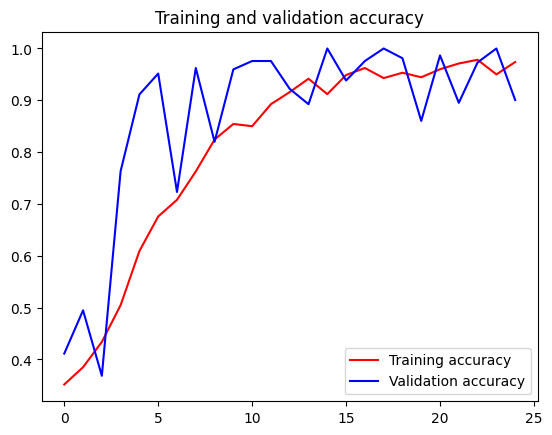

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
